In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from math import degrees, isnan, pi
import wget
import gemmi
import statistics

# 1.1 Load PDB codes of dataset_1 and Download Structure Files

In [2]:
# Open the file 'dataset_1.txt' in read mode
with open('dataset_1.txt', 'r') as file:
    
    # Read the contents of the file into the variable 'pdb_code'
    pdb_codes = file.read()

# Split the content of pdb_codes using ',' as delimiter to get list of PDB codes
pdb_list_1 = pdb_codes.split(',')

In [3]:
# Create a directly 'dataset_1', in the directory 'download'

! mkdir -p download/dataset_1

In [4]:
for pdb in tqdm(pdb_list_1) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/dataset_1")

# 1.2 Extract Φ and Ψ angles and plot Ramachandran plot for dataset_1

In [5]:
# Define empty lists to store phi and psi angles
phi_angles = []
psi_angles = []

# Define an empty list to store resolution values
high_resolution_values = [ ]


# Iterate over each PDB file in dataset_1
for path in tqdm(gemmi.CoorFileWalk("download/dataset_1"), total=len(pdb_list_1)) :
    
    # Read the structure from the PDB file
    structure = gemmi.read_structure(path)
    model = structure[0]
    
    # Extract and store resolution value for each structure
    high_resolution_values.append(structure.resolution)
    
    # Iterate over each chain in the structure 
    for chain in model:
        
        # Iterate over each residue in the chain
        for residue in chain :
            
            # Get the next and previous residues in the chain
            next_res = chain.next_residue(residue)
            prev_res = chain.previous_residue(residue)

            if next_res:
                phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                
                # Check if the calculated angles are valid (not NaN)
                if not isnan(phi) and not isnan(psi):
                    
                    # Convert angles from radians to degrees and append to lists
                    phi_angles.append(degrees(phi))
                    psi_angles.append(degrees(psi))

  0%|          | 0/1611 [00:00<?, ?it/s]

/var/folders/qm/mcfvcgl52c9ck0j9zd0dw_0h0000gn/T/ipykernel_26606/3563990962.py:4: RuntimeWarning: divide by zero encountered in log10
  hist_log = np.log10(hist)


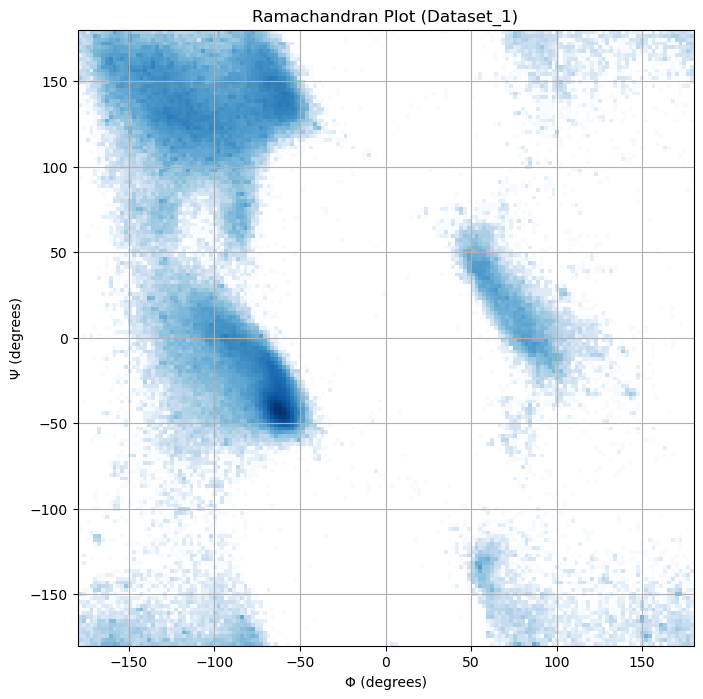

In [6]:
## Ramachandran plot for Dataset_1

hist, xedges, yedges = np.histogram2d(phi_angles, psi_angles, bins=160)

# Transform the frequency values to logarithmic scale
hist_log = np.log10(hist)

# Create a new figure
fig = plt.figure(figsize=(8, 8))

# Plot the 2D histogram with logarithmic scaling
plt.imshow(hist_log.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap="Blues", origin='lower', vmin=0, vmax=np.max(hist_log))

# Add labels
plt.title('Ramachandran Plot (Dataset_1)')
plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

fig.savefig("./plots/Ramachandran Plot (Data set 1).png")

# 2.1 Load PDB codes of dataset_2 and Download Structure Files

In [7]:
# Open the file 'dataset_1.txt' in read mode
with open('dataset_2.txt', 'r') as file:
    
    # Read the contents of the file into the variable 'pdb_code'
    pdb_codes_2 = file.read()

# Split the content of pdb_codes using ',' as delimiter to get list of PDB codes
pdb_list_2 = pdb_codes_2.split(',')

#print(pdb_list_2)

In [8]:
# Create a directly 'dataset_1', in the directory 'download'

! mkdir -p download/dataset_2

In [9]:
for pdb in tqdm(pdb_list_2) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/dataset_2")

# 2.2 Extract Φ and Ψ angles and plot Ramachandran plot for dataset_2

In [10]:
# Define empty lists to store phi and psi angles
phi_angles_2 = []
psi_angles_2 = []

# Define an empty list to store resolution values
low_resolution_values = [ ]

# Iterate over each PDB file in dataset_2
for path in tqdm(gemmi.CoorFileWalk("download/dataset_2"), total=len(pdb_list_2)) :
    
    # Read the structure from the PDB file
    structure = gemmi.read_structure(path)
    model = structure[0]
    
    # Extract and store resolution value for each structure
    low_resolution_values.append(structure.resolution)
    
    # Iterate over each chain in the structure 
    for chain in model:
        # Iterate over each residue in the chain
        for residue in chain :
            # Get the next and previous residues in the chain
            next_res = chain.next_residue(residue)
            prev_res = chain.previous_residue(residue)

            if next_res:
                phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                
                # Check if the calculated angles are valid (not NaN)
                if not isnan(phi) and not isnan(psi):
                    
                    # Convert angles from radians to degrees and append to lists
                    phi_angles_2.append(degrees(phi))
                    psi_angles_2.append(degrees(psi))

  0%|          | 0/1672 [00:00<?, ?it/s]

/var/folders/qm/mcfvcgl52c9ck0j9zd0dw_0h0000gn/T/ipykernel_26606/4211316183.py:5: RuntimeWarning: divide by zero encountered in log10
  hist_log = np.log10(hist)


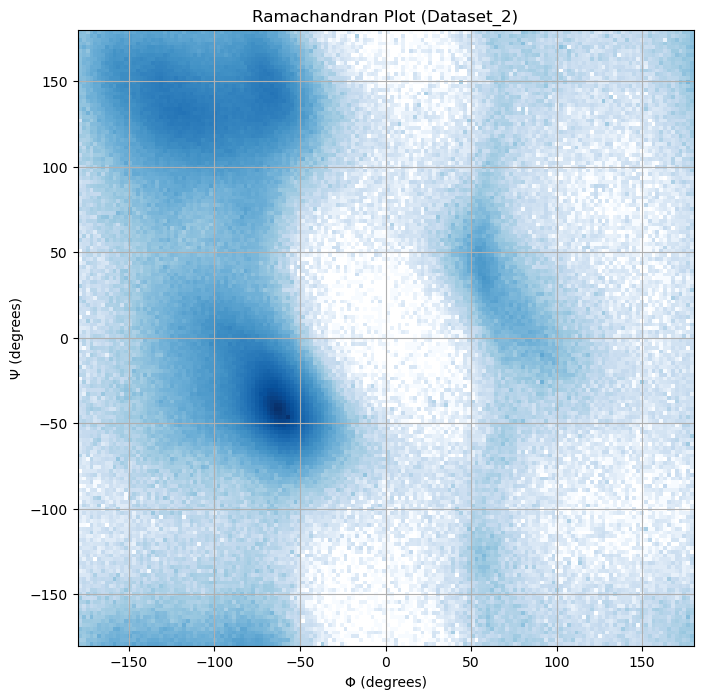

In [11]:
## Ramachandran plot for Dataset_1

hist, xedges, yedges = np.histogram2d(phi_angles_2, psi_angles_2, bins=160)

# Transform the frequency values to logarithmic scale
hist_log = np.log10(hist)

fig2 = plt.figure(figsize=(8, 8))

# Plot the 2D histogram with logarithmic scaling
plt.imshow(hist_log.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap="Blues", origin='lower', vmin=0, vmax=np.max(hist_log))

# Add labels
plt.title('Ramachandran Plot (Dataset_2)')
plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)
plt.show()

# Save the plot as a PNG file
fig2.savefig("./plots/Ramachandran Plot (Dataset_2).png")

# 3.0 Checking Resolution Distribution

## 3.1 For combined dataset_1 and dataset_2 data

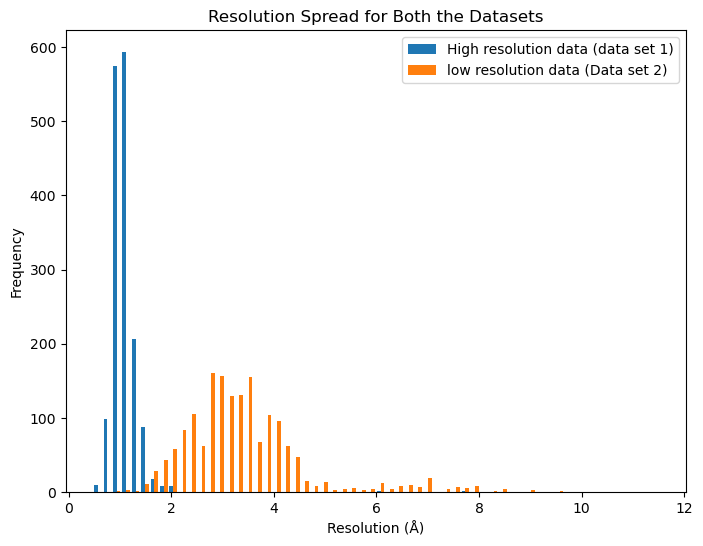

In [12]:
## Resolution Distribution of dataset_1 and dataset_2

fig3 = plt.figure(figsize=(8, 6))

# Plot histograms for high and low resolution values
plt.hist ([high_resolution_values, low_resolution_values], 
          bins=60, 
          label=['High resolution data (data set 1)', 'low resolution data (Data set 2)'])

# Add title, legend and labels
plt.title('Resolution Spread for Both the Datasets')
plt.legend(loc='upper right')

plt.xlabel("Resolution (Å)")
plt.ylabel ("Frequency")

plt.show()

# Save the plot as a PNG file
fig3.savefig("./plots/Resolution Spread.png")

## 3.2 For dataset_2 alone

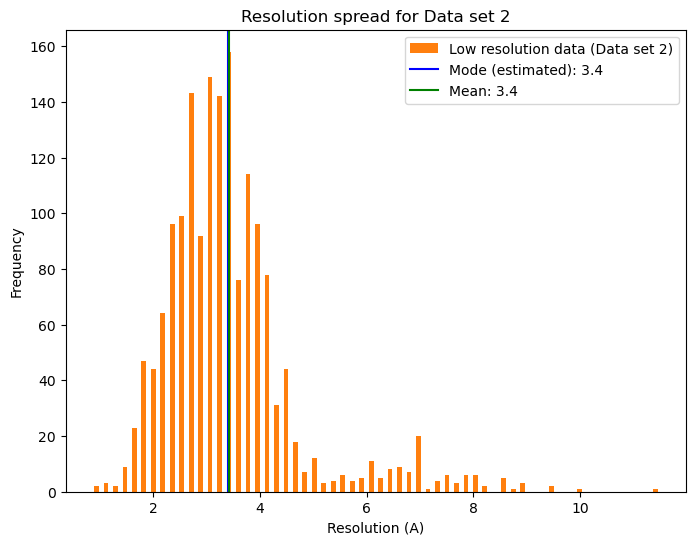

In [13]:
## Resolution distribution of dataset_2 

fig4 = plt.figure(figsize=(8, 6))

# Plot histogram for low resolution values
plot = plt.hist (low_resolution_values, 
          bins=60, 
          rwidth=0.5, 
          label='Low resolution data (Data set 2)',
          color = '#ff7f0e')
# Finding the mode interval
bin_max_start = round(plot[1][np.argmax(plot[0])], 1) 
bin_max_end = round(plot[1][np.argmax(plot[0])+1], 1)

# Drawing vertical lines at estimated (average) mode
plt.axvline(x= (bin_max_end+bin_max_start)/2, # taking avearge
            color='b',
            linestyle = '-',
            label = f'Mode (estimated): {round((bin_max_end+bin_max_start)/2, 6)}', alpha = 1.0,
            linewidth = 1.5
           )

plt.axvline(x= np.mean(low_resolution_values),
            color='g',
            linestyle = '-',
            label = f'Mean: {round(np.mean(low_resolution_values), 1)}', alpha = 1.0,
            linewidth = 1.5
           )

# Add title legend and labels
plt.title("Resolution spread for Data set 2")
plt.legend(loc='upper right')

plt.xlabel("Resolution (A)")
plt.ylabel ("Frequency")

plt.show()

# Save the plot as a PNG file
fig4.savefig("./plots/Resolutionspread_D2.png")

# 4.0 Filtering dataset_2

## 4.1 Filtering dataset_2 by Resolution alone

In [14]:
resolution_filter = 3.4 # taking mode value

# Define empty lists for filtered phi and psi angles
filtered_res_phi_angles_2 = []
filtered_res_psi_angles_2 = []

# Iterate over each PDB file in dataset_2
for path in tqdm(gemmi.CoorFileWalk("download/dataset_2"), total=len(pdb_list_2)) :
    structure = gemmi.read_structure(path)
    model = structure[0]
    
    # Check if structure resolution is below the specified filter
    if structure.resolution < resolution_filter:
        
        # Iterate over each chain in the structure
        for chain in model:
            
            # Iterate over each residue in the chain
            for residue in chain :
                next_res = chain.next_residue(residue)
                prev_res = chain.previous_residue(residue)
                
                # Calculate phi and psi angles if next residue is present
                if next_res:
                    phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                    
                    # Check if the calculated angles are valid (not NaN)
                    if not isnan(phi) and not isnan(psi):
                        # Convert angles from radians to degrees and append to filtered lists
                        filtered_res_phi_angles_2.append(degrees(phi))
                        filtered_res_psi_angles_2.append(degrees(psi))
                        

  0%|          | 0/1672 [00:00<?, ?it/s]

/var/folders/qm/mcfvcgl52c9ck0j9zd0dw_0h0000gn/T/ipykernel_26606/189765743.py:5: RuntimeWarning: divide by zero encountered in log10
  hist_log = np.log10(hist)


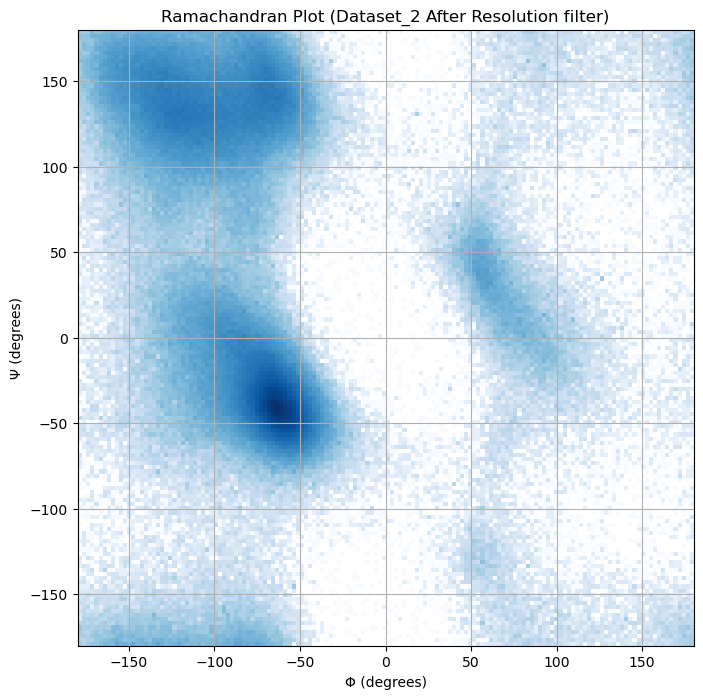

In [15]:
## Resolution filtered Ramachandranplot for Dataset_2


hist, xedges, yedges = np.histogram2d(filtered_res_phi_angles_2, filtered_res_psi_angles_2, bins=150)

# Transform the frequency values to logarithmic scale
hist_log = np.log10(hist)

# Create a new figure
fig5 = plt.figure(figsize=(8, 8))

# Plot the 2D histogram with logarithmic scaling
plt.imshow(hist_log.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap="Blues", origin='lower', vmin=0, vmax=np.max(hist_log))

# Add  labels
plt.title('Ramachandran Plot (Dataset_2 After Resolution filter)')
plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')

# Set limits and grid
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.grid(True)

plt.show()

# Save the plot as a PNG file
fig5.savefig('./plots/Ramachandran Plot (After Resolution filter).png')

## 4.2 Filtering dataset_2 by average B factors alone

### For dataset 1

In [16]:
avg_main_chain_bfactors_1 = [] # Store per protein averages here
avg_side_chain_bfactors_1 = []
avg_bfactors_1 = [] # Combines averages

# Iterate over each PDB file in dataset_1
for path in tqdm(gemmi.CoorFileWalk("download/dataset_1"), total=len(pdb_list_1)):
    structure = gemmi.read_structure(path)
    model = structure[0]
    main_chain_bfactors = [] # Store per residue main chain B-factors
    side_chain_bfactors = [] # Store per residue side chain B-factors
    
    # Iterate over each chain in the structure
    for chain in model:

        # Iterate over each residue in the chain
        for residue in chain:
            # Check if the residue is an amino acid
            if gemmi.find_tabulated_residue(residue.name).is_amino_acid():

                # Iterate over each atom in the residue
                for atom in residue:
                    if atom.name in ["CA", "N", "C", "O"]:
                        main_chain_bfactors.append(atom.b_iso)
                    else:
                        side_chain_bfactors.append(atom.b_iso)
    
    # Calculate the average main chain B-factor for the protein
    if main_chain_bfactors:  # Check if there are main chain atoms present
        avg_main_chain_bfactors_1.append(statistics.mean(main_chain_bfactors))
    else:
        avg_main_chain_bfactors_1.append(0.0)  # Special case for residues without main chain atoms
    
    # Calculate the average side chain B-factor for the protein
    if side_chain_bfactors:  # Check if there are side chain atoms present
        avg_side_chain_bfactors_1.append(statistics.mean(side_chain_bfactors))
    else:
        avg_side_chain_bfactors_1.append(0.0)  # Special case for residues without side chain atoms

    # Calculate the overall average B-factor for the residue by combining main chain and side chain B-factors
    if side_chain_bfactors or main_chain_bfactors:
        avg_bfactors_1.append((sum(main_chain_bfactors) + sum(side_chain_bfactors)) / (len(main_chain_bfactors) + len(side_chain_bfactors)))
    else:
        avg_bfactors_1.append(0.0)
            
            

  0%|          | 0/1611 [00:00<?, ?it/s]

### For Dataset 2

In [17]:
avg_main_chain_bfactors_2 = [] # Store per protein averages here
avg_side_chain_bfactors_2 = []
avg_bfactors_2 = [] # Combines averages

# Iterate over each PDB file in dataset_2
for path in tqdm(gemmi.CoorFileWalk("download/dataset_2"), total=len(pdb_list_2)):
    structure = gemmi.read_structure(path)
    model = structure[0]
    main_chain_bfactors = [] # Store per residue main chain B-factors
    side_chain_bfactors = [] # Store per residue side chain B-factors
    
    # Iterate over each chain in the structure
    for chain in model:

        # Iterate over each residue in the chain
        for residue in chain:
            
            # Check if the residue is an amino acid
            if gemmi.find_tabulated_residue(residue.name).is_amino_acid():

                # Iterate over each atom in the residue
                for atom in residue:
                    if atom.name in ["CA", "N", "C", "O"]:
                        main_chain_bfactors.append(atom.b_iso)
                    else:
                        side_chain_bfactors.append(atom.b_iso)

    # Calculate the average main chain B-factor for the protein
    if main_chain_bfactors:  # Check if there are main chain atoms present
        avg_main_chain_bfactors_2.append(statistics.mean(main_chain_bfactors))
    else:
        avg_main_chain_bfactors_2.append(0.0)  # Special case for residues without main chain atoms

    # Calculate the average side chain B-factor for the protein
    if side_chain_bfactors:  # Check if there are side chain atoms present
        avg_side_chain_bfactors_2.append(statistics.mean(side_chain_bfactors))
    else:
        avg_side_chain_bfactors_2.append(0.0)  # Special case for residues without side chain atoms

    # Calculate the overall average B-factor for the residue by combining main chain and side chain B-factors
    if side_chain_bfactors or main_chain_bfactors:
        avg_bfactors_2.append((sum(main_chain_bfactors) + sum(side_chain_bfactors)) / (len(main_chain_bfactors) + len(side_chain_bfactors)))
    else:
        avg_bfactors_2.append(0.0)
        
        

  0%|          | 0/1672 [00:00<?, ?it/s]

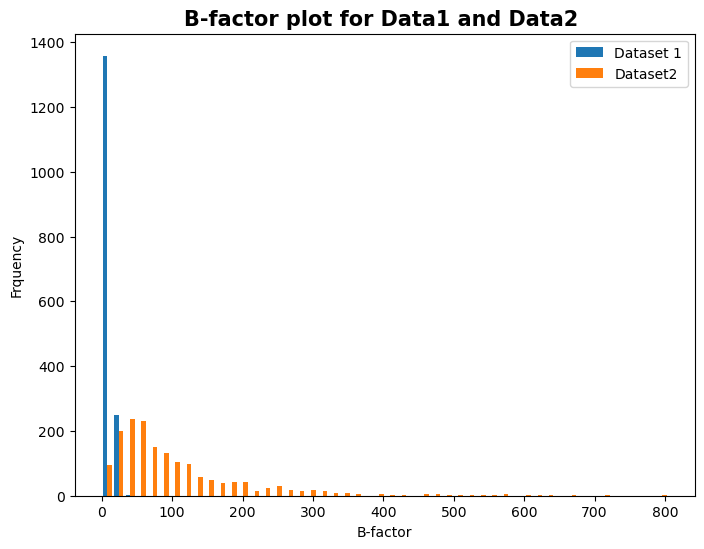

In [18]:
## B-factor distribution

fig6 = plt.figure(figsize=(8, 6))  

plt.title ("B-factor plot for Data1 and Data2 ",
             fontsize = 15,
             fontweight = "bold" )

# Plot histograms for average B-factors of Data set 1 and Data set 2
plt.hist([avg_bfactors_1, avg_bfactors_2],bins=50, label=['Dataset 1', 'Dataset2'] )

# Add labels and legend
plt.xlabel ( "B-factor" )
plt.ylabel ( "Frquency" )
plt.legend ( )
plt.show ( )

# Save the plot as a PNG file
fig6.savefig("./plots/B-factor plotData1Data2.png")


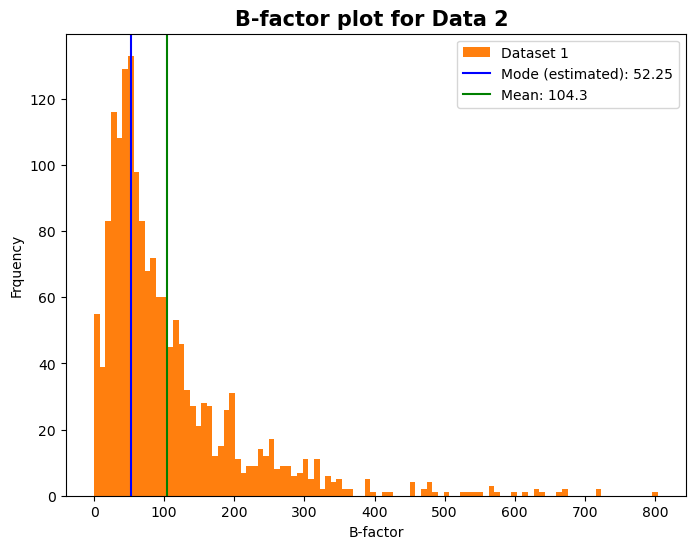

In [19]:
## B-factor distribution

fig7 = plt.figure(figsize=(8, 6)) 
plt.title ("B-factor plot for Data 2 ",
             fontsize = 15,
             fontweight = "bold" )

# Plot histograms for average B-factors of Data set 2
plot2=plt.hist(avg_bfactors_2, bins=100, label=['Dataset 1', 'Dataset2'], color = '#ff7f0e' )

# Finding the mode interval
bin_max_start2 = round(plot2[1][np.argmax(plot2[0])], 1) 
bin_max_end2 = round(plot2[1][np.argmax(plot2[0])+1], 1)

# Drawing vertical lines at estimated (average) mode
plt.axvline(x= (bin_max_end2+bin_max_start2)/2, # taking avearge
            color='b',
            linestyle = '-',
            label = f'Mode (estimated): {round((bin_max_end2+bin_max_start2)/2, 6)}', alpha = 1.0,
            linewidth = 1.5
           )

plt.axvline(x= np.mean(avg_bfactors_2),
            color='g',
            linestyle = '-',
            label = f'Mean: {round(np.mean(avg_bfactors_2), 1)}', alpha = 1.0,
            linewidth = 1.5
           )


# Add labels and legend
plt.xlabel ( "B-factor" )
plt.ylabel ( "Frquency" )
plt.legend ( )
plt.show ( )

# Save the plot as a PNG file
fig7.savefig('./plots/B-factor plot for Data 2.png')


In [20]:
# Getting average and standard deviation of B-factors
std_avg_bfactor_data2 = np.std(avg_bfactors_2)
mean_avg_bfactor_data2 = np.mean(avg_bfactors_2)

In [21]:

bfactor_uppercap = 20  # adjusting this to get optimum graph comparable with graphs for data 1

# Define empty lists for filtered phi and psi angles
filtered_bfac_phi_angles_2 = []
filtered_bfac_psi_angles_2 = []


# Iterate over each PDB file in dataset_2
for path in tqdm(gemmi.CoorFileWalk("download/dataset_2"), total=len(pdb_list_2)) :
    structure = gemmi.read_structure(path)
    model = structure[0]
    bfactors =[]
    
    # Iterate over each chain and each residue in the structure
    for chain in model:
        for residue in chain:
            
            # Check if the residue is an amino acid
            if gemmi.find_tabulated_residue(residue.name).is_amino_acid():
                
                # Iterate over each atom in the residue
                for atom in residue:
                    bfactors.append(atom.b_iso)
    
    # Check if the mean B-factor of the structure is below the specified upper cap
    if np.mean(bfactors) <= bfactor_uppercap:
        # Iterate over each chain and each residue in the structure
        for chain in model:
            for residue in chain :
                next_res = chain.next_residue(residue)
                prev_res = chain.previous_residue(residue)

                if next_res:
                    phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                    
                    # Check if the calculated angles are valid (not NaN)
                    if not isnan(phi) and not isnan(psi):
                        
                        # Convert angles from radians to degrees and append to filtered lists
                        filtered_bfac_phi_angles_2.append(degrees(phi))
                        filtered_bfac_psi_angles_2.append(degrees(psi))




  0%|          | 0/1672 [00:00<?, ?it/s]

/Users/rakesh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rakesh/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/qm/mcfvcgl52c9ck0j9zd0dw_0h0000gn/T/ipykernel_26606/2432859567.py:5: RuntimeWarning: divide by zero encountered in log10
  hist_log = np.log10(hist)


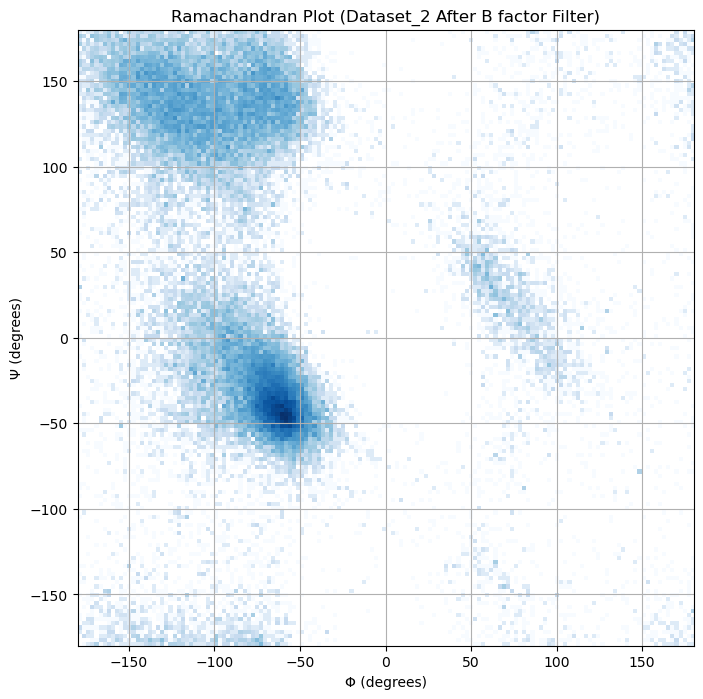

In [22]:
## Ramachandran plot for dataset_2 with B-factor filter alone

# Calculate the 2D histogram with logarithmic scaling
hist, xedges, yedges = np.histogram2d(filtered_bfac_phi_angles_2, filtered_bfac_psi_angles_2, bins=150)

# Transform the frequency values to logarithmic scale
hist_log = np.log10(hist)

fig8 = plt.figure(figsize=(8, 8))

# Plot the 2D histogram with logarithmic scaling
plt.imshow(hist_log.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap="Blues", origin='lower', vmin=0, vmax=np.max(hist_log))

# Add title, label, limits and grid
plt.title('Ramachandran Plot (Dataset_2 After B factor Filter)')
plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')
plt.grid(True)
plt.show()

# Save the plot as a PNG file
fig8.savefig('./plots/Ramachandran Plot (After B factor Filter).png')

## 4.3 Combined Filter For resolution and B Factor

In [23]:
resolution_filter = 3.4 # taking mode value
bfactor_filter = 34.8 # taking the mode valeu

# Define empty lists for filtered phi and psi angles
filtered_phi_angles_2 = []
filtered_psi_angles_2 = []
b_factors_monomer = []

# Iterate over each PDB file in dataset_2
for path in tqdm(gemmi.CoorFileWalk("download/dataset_2"), total=len(pdb_list_2)) :
    structure = gemmi.read_structure(path)
    model = structure[0]
    
    # Check if structure resolution is below the specified filter
    if structure.resolution < resolution_filter:
        
        # Iterate over each chain in the structure
        for chain in model:
            
            # Iterate over each residue in the chain
            for residue in chain :
                monomer_bfactor = [ ] # one for main-chains, one for side-chains
                next_res = chain.next_residue(residue)
                prev_res = chain.previous_residue(residue)
                
                for atom in residue:
                    monomer_bfactor.append(atom.b_iso)
                    b_factors_monomer.append(atom.b_iso)
                    
                # Calculate phi and psi angles if next residue is present and
                # if average B-factor of the residue is less than filter value
                if next_res and np.mean(monomer_bfactor) <= bfactor_filter:
                    phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
                    
                    # Check if the calculated angles are valid (not NaN)
                    if not isnan(phi) and not isnan(psi):
                        # Convert angles from radians to degrees and append to filtered lists
                        filtered_phi_angles_2.append(degrees(phi))
                        filtered_psi_angles_2.append(degrees(psi))
                        


  0%|          | 0/1672 [00:00<?, ?it/s]

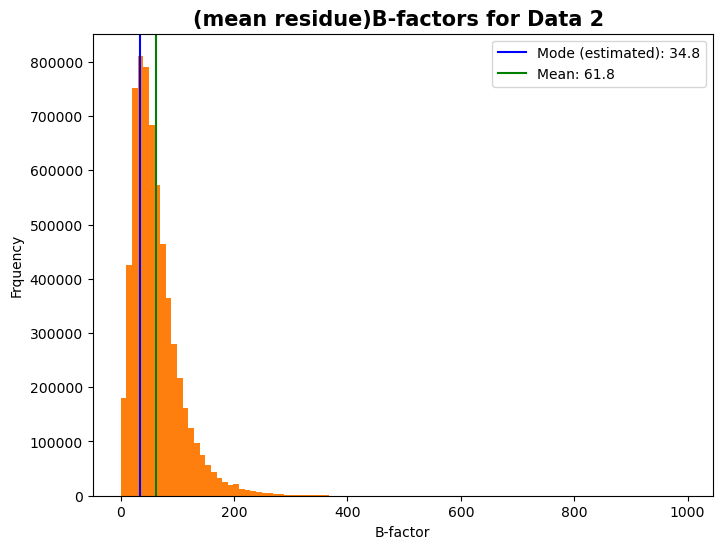

In [24]:
## mean B-factor values of residues distribution

fig9 = plt.figure(figsize=(8, 6)) 
plt.title ("(mean residue)B-factors for Data 2 ",
             fontsize = 15,
             fontweight = "bold" )

# Plot histograms for average B-factors of Data set 2
plot3=plt.hist(b_factors_monomer, bins=100, color = '#ff7f0e' )

# Finding the mode interval
bin_max_start3 = round(plot3[1][np.argmax(plot3[0])], 1) 
bin_max_end3 = round(plot3[1][np.argmax(plot3[0])+1], 1)

# Drawing vertical lines at estimated (average) mode
plt.axvline(x= (bin_max_end3+bin_max_start3)/2, # taking avearge
            color='b',
            linestyle = '-',
            label = f'Mode (estimated): {round((bin_max_end3+bin_max_start3)/2, 1)}', alpha = 1.0,
            linewidth = 1.5
           )

plt.axvline(x= np.mean(b_factors_monomer),
            color='g',
            linestyle = '-',
            label = f'Mean: {round(np.mean(b_factors_monomer), 1)}', alpha = 1.0,
            linewidth = 1.5
           )


# Add labels and legend
plt.xlabel ( "B-factor" )
plt.ylabel ( "Frquency" )
plt.legend ( )
plt.show ( )

# Save the plot as a PNG file
fig9.savefig('./plots/B-factor(mean residue) plot for Data 2.png')

In [1]:
## Ramachandran plot for dataset_2 after resolution and B-factor filters

hist, xedges, yedges = np.histogram2d(filtered_phi_angles_2, filtered_psi_angles_2, bins=160)

# Transform the frequency values to logarithmic scale
hist_log = np.log10(hist)

fig10 = plt.figure(figsize=(8, 8))

# Plot the 2D histogram with logarithmic scaling
plt.imshow(hist_log.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap="Blues", origin='lower', vmin=0, vmax=np.max(hist_log))

# Add title, label, limits and grid
plt.title('Ramachandran Plot (Dataset_2 After Resolution and B factor Filter)')

plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')
plt.grid(True)
plt.show()

# Save the plot as a PNG file
fig10.savefig('./plots/Ramachandran Plot (After resolution and B factor Filter).png')

NameError: name 'np' is not defined